In [33]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [34]:
#划分验证集,也可以在后续直接指定validation_split来划分
# X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_train = X_train_full / 255.
y_train = y_train_full
X_test = X_test / 255.
y_test = y_test

X_train_c = X_train[..., np.newaxis]
X_test_c = X_test[..., np.newaxis]

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
# 设定图片保存路径，这里写了一个函数，后面直接调用即可
PROJECT_ROOT_DIR = os.path.abspath('.')   # 表示当前所处的文件夹的绝对路径
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
print(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

D:\workplace\notebook\ML_Final\images


In [6]:
from sklearn import neighbors
import datetime
import numpy as np
import struct
import matplotlib.pyplot as plt
def read_image(file_name):
    file_handle=open(file_name,"rb")  #以二进制打开文档
    file_content=file_handle.read()   #读取到缓冲区中
    head = struct.unpack_from('>IIII', file_content, 0)  # 取前4个整数，返回一个元组
    offset = struct.calcsize('>IIII')
    imgNum = head[1]  #图片数
    width = head[2]   #宽度
    height = head[3]  #高度
    bits = imgNum * width * height  # data一共有60000*28*28个像素值
    bitsString = '>' + str(bits) + 'B'  # fmt格式：'>47040000B'
    imgs = struct.unpack_from(bitsString, file_content, offset)  # 取data数据，返回一个元组
    imgs_array=np.array(imgs).reshape((imgNum,width*height))     #最后将读取的数据reshape成 【图片数，图片像素】二维数组
    return imgs_array
def out_image(img):
    plt.figure()
    plt.imshow(img)
    plt.show()
def read_label(file_name):
    file_handle = open(file_name, "rb")  # 以二进制打开文档
    file_content = file_handle.read()  # 读取到缓冲区中
    head = struct.unpack_from('>II', file_content, 0)  # 取前2个整数，返回一个元组
    offset = struct.calcsize('>II')
    labelNum = head[1]  # label数
    bitsString = '>' + str(labelNum) + 'B'  # fmt格式：'>47040000B'
    label = struct.unpack_from(bitsString, file_content, offset)  # 取data数据，返回一个元组
    return np.array(label)
def get_data():
    # 文件获取
    train_image = "fashionmnist/train-images-idx3-ubyte"
    test_image = "fashionmnist/t10k-images-idx3-ubyte"
    train_label = "fashionmnist/train-labels-idx1-ubyte"
    test_label = "fashionmnist/t10k-labels-idx1-ubyte"
    # 读取数据
    train_x = read_image(train_image)
    test_x = read_image(test_image)
    train_y = read_label(train_label)
    test_y = read_label(test_label)
    #out_image(np.array(test_x[1]).reshape(28, 28))
    return train_x,train_y,test_x,test_y

# KNN

k ========================= 1.000000
training took 283.473833s!
k ========================= 2.000000
training took 288.170899s!
k ========================= 3.000000
training took 308.817503s!
k ========================= 4.000000
training took 309.420797s!
k ========================= 5.000000
training took 291.583019s!
k ========================= 6.000000
training took 290.109741s!
k ========================= 7.000000
training took 293.235578s!
k ========================= 8.000000
training took 294.947848s!
k ========================= 9.000000
training took 293.949538s!
Saving figure KNN


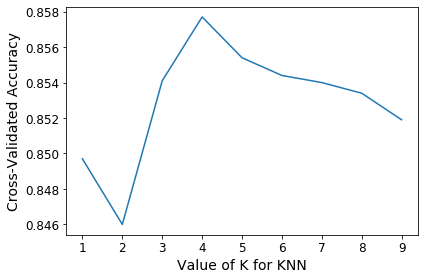

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn import metrics

k_range = range(1,10)
k_scores = []

train_x, train_y, test_x, test_y = get_data()

for k in k_range:
    start_time = time.time()
    print('k ========================= %f' % k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=8)
    # 交叉验证
    # loss = -cross_val_score(knn, X, y, cv=10, scoring='mean_squared_error') # for regression
    # scores = cross_val_score(knn, X, y, cv=4,scoring='accuracy') # for classification
    knn.fit(train_x,train_y)
    predict = knn.predict(test_x)
    accuracy = metrics.accuracy_score(test_y, predict)
    k_scores.append(accuracy)
    print('training took %fs!' % (time.time() - start_time))
plt.figure()
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
save_fig('KNN')
plt.show()

所以选择k=4作为KNN模型的参数

In [9]:
print('************* KNN ************')
start_time = time.time()
model_knn = KNeighborsClassifier(n_neighbors=4,weights='distance',n_jobs=10)
model_knn.fit(train_x, train_y)
print('training took %fs!' % (time.time() - start_time))

************* KNN ************
training took 34.528833s!


In [11]:
# 根据模型做预测，返回预测结果
start_time = time.time()
predict_knn = model_knn.predict(test_x)

print('predict took %fs!' % (time.time() - start_time))

predict took 266.205190s!


In [14]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predict_knn))

precision_knn = metrics.precision_score(test_y, predict_knn,average='macro')
recall_knn = metrics.recall_score(test_y, predict_knn,average='macro')
print('precision: %.2f%%, recall: %.2f%%' % (100 * precision_knn, 100 * recall_knn))
accuracy = metrics.accuracy_score(test_y, predict_knn)
print('accuracy: %.2f%%' % (100 * accuracy))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.80      0.77      1000
           3       0.90      0.87      0.89      1000
           4       0.79      0.77      0.78      1000
           5       1.00      0.83      0.91      1000
           6       0.63      0.63      0.63      1000
           7       0.89      0.96      0.92      1000
           8       0.98      0.96      0.97      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

precision: 86.26%, recall: 85.97%
accuracy: 85.97%


In [ ]:
y_score = model_knn.predict_proba(test_x)

Saving figure knn_roc


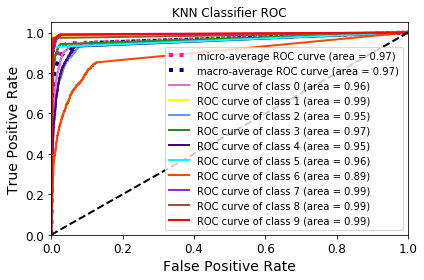

In [19]:
from scipy import interp
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
test_y_knn = label_binarize(test_y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

n_classes = 10

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_knn[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_knn.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['Orchid', 'Yellow', 'cornflowerblue', 'ForestGreen', 'Indigo','Cyan', 'OrangeRed', 'BlueViolet', 'Sienna', 'Red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier ROC')
plt.legend(loc="lower right")
save_fig('knn_roc')
plt.show()

# 朴素贝叶斯

************* bayes ************
training took 0.740536s!
predict took 0.082294s!
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1000
           1       0.99      0.87      0.93      1000
           2       0.59      0.57      0.58      1000
           3       0.66      0.87      0.75      1000
           4       0.44      0.60      0.51      1000
           5       0.66      0.14      0.23      1000
           6       0.32      0.16      0.22      1000
           7       0.60      0.92      0.73      1000
           8       0.87      0.80      0.84      1000
           9       0.68      0.84      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.65      0.66      0.63     10000
weighted avg       0.65      0.66      0.63     10000

precision: 65.41%, recall: 65.54%
accuracy: 65.54%
Saving figure bayes_roc


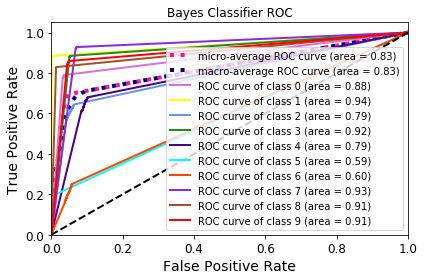

In [20]:
from sklearn.naive_bayes import MultinomialNB
print('************* bayes ************')
start_time = time.time()
model_b = MultinomialNB(alpha=1,fit_prior=True)
model_b.fit(train_x, train_y)
print('training took %fs!' % (time.time() - start_time))

# 根据模型做预测，返回预测结果
start_time = time.time()
predict_b = model_b.predict(test_x)
print('predict took %fs!' % (time.time() - start_time))

print(classification_report(test_y, predict_b))

precision_b = metrics.precision_score(test_y, predict_b,average='macro')
recall_b = metrics.recall_score(test_y, predict_b,average='macro')
print('precision: %.2f%%, recall: %.2f%%' % (100 * precision_b, 100 * recall_b))
accuracy_b = metrics.accuracy_score(test_y, predict_b)
print('accuracy: %.2f%%' % (100 * accuracy_b))

y_score_b = model_b.predict_proba(test_x)

# test_y_b = label_binarize(test_y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

n_classes = 10

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_knn[:, i], y_score_b[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_knn.ravel(), y_score_b.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['Orchid', 'Yellow', 'cornflowerblue', 'ForestGreen', 'Indigo','Cyan', 'OrangeRed', 'BlueViolet', 'Sienna', 'Red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bayes Classifier ROC')
plt.legend(loc="lower right")
save_fig('bayes_roc')
plt.show()

# 随机森林模型的训练

************* bayes ************
training took 45.798449s!
predict took 0.373469s!
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.88      0.90      0.89      1000
           4       0.76      0.81      0.79      1000
           5       0.98      0.95      0.97      1000
           6       0.72      0.58      0.64      1000
           7       0.92      0.96      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000

precision: 87.53%, recall: 87.61%
accuracy: 87.61%
Saving figure rf_roc


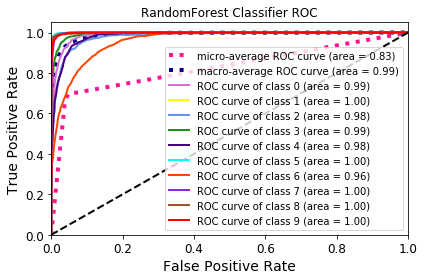

In [21]:
from sklearn.ensemble import RandomForestClassifier
print('************* bayes ************')
start_time = time.time()
model_r = RandomForestClassifier(n_estimators=100,max_depth=50,criterion='entropy',n_jobs=10)
model_r.fit(train_x, train_y)
print('training took %fs!' % (time.time() - start_time))

# 根据模型做预测，返回预测结果
start_time = time.time()
predict_r = model_r.predict(test_x)
print('predict took %fs!' % (time.time() - start_time))

print(classification_report(test_y, predict_r))

precision_r = metrics.precision_score(test_y, predict_r,average='macro')
recall_r = metrics.recall_score(test_y, predict_r,average='macro')
print('precision: %.2f%%, recall: %.2f%%' % (100 * precision_r, 100 * recall_r))
accuracy_r = metrics.accuracy_score(test_y, predict_r)
print('accuracy: %.2f%%' % (100 * accuracy_r))

y_score_r = model_r.predict_proba(test_x)

# test_y_b = label_binarize(test_y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

n_classes = 10

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_knn[:, i], y_score_r[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_knn.ravel(), y_score_b.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['Orchid', 'Yellow', 'cornflowerblue', 'ForestGreen', 'Indigo','Cyan', 'OrangeRed', 'BlueViolet', 'Sienna', 'Red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Classifier ROC')
plt.legend(loc="lower right")
save_fig('rf_roc')
plt.show()

# CNN模型的训练

In [26]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_cnn = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])
model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model_cnn.fit(X_train_c, y_train, epochs=15, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 762s 14ms/sample - loss: 0.6937 - acc: 0.7568 - val_loss: 0.4551 - val_acc: 0.8432
Epoch 2/15
54000/54000 [==============================] - 770s 14ms/sample - loss: 0.3961 - acc: 0.8649 - val_loss: 0.3045 - val_acc: 0.8882
Epoch 3/15
54000/54000 [==============================] - 771s 14ms/sample - loss: 0.3419 - acc: 0.8824 - val_loss: 0.2807 - val_acc: 0.8977
Epoch 4/15
54000/54000 [==============================] - 765s 14ms/sample - loss: 0.3125 - acc: 0.8925 - val_loss: 0.2735 - val_acc: 0.9015
Epoch 5/15
54000/54000 [==============================] - 779s 14ms/sample - loss: 0.2830 - acc: 0.9028 - val_loss: 0.2556 - val_acc: 0.9013
Epoch 6/15
54000/54000 [==============================] - 763s 14ms/sample - loss: 0.2652 - acc: 0.9086 - val_loss: 0.2735 - val_acc: 0.9043
Epoch 7/15
54000/54000 [==============================] - 732s 14ms/sample - loss: 0.2511 - acc: 0.9136 -

In [35]:
score = model_cnn.evaluate(X_test_c, y_test)

10000/10000 [==============================] - 49s 5ms/sample - loss: 0.3083 - acc: 0.9099


Saving figure learning_curves_cnn


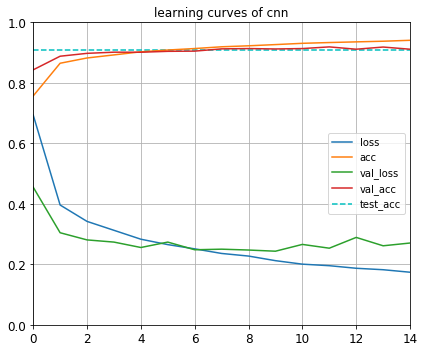

In [39]:
import pandas as pd
import numpy as np

pd.DataFrame(history.history).plot(figsize=(6, 5))

plt.hlines(score[1],0,16,colors = "c", linestyles = "dashed",label = 'test_acc')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('learning curves of cnn')
plt.legend()
save_fig("learning_curves_cnn")
plt.show()